# Exploring Data

## Determining available data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import glob
files = glob.glob('zippedData/*')
files

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

## Organizing Files

In [2]:
#Isolating the primary key and creating a list of the other columns within each file. 
#Then, using these lists to create a dataframe for easy reference.

primary_keys = []
other_columns = []

for file in files:
    try:
        primary_keys.append(pd.read_csv(file).columns[0])
        other_columns.append(list(pd.read_csv(file).columns[1:]))
    except:
        primary_keys.append(pd.read_csv(file,sep='\t',encoding='latin1').columns[0])
        other_columns.append(list(pd.read_csv(file,sep='\t',encoding='latin1').columns[1:]))

In [3]:
#Creating a dictionary from the above lists

data = {'File':files,'Primary Key':primary_keys,'Other Columns':other_columns}

# Creating the dataframe and ensuring we can view all values in the "Other Columns"

files_df = pd.DataFrame(data).sort_values('File')
pd.set_option('display.max_colwidth',1000)
files_df

,File,Primary Key,Other Columns
9,zippedData/bom.movie_gross.csv.gz,title,"[studio, domestic_gross, foreign_gross, year]"
4,zippedData/imdb.name.basics.csv.gz,nconst,"[primary_name, birth_year, death_year, primary_profession, known_for_titles]"
2,zippedData/imdb.title.akas.csv.gz,title_id,"[ordering, title, region, language, types, attributes, is_original_title]"
6,zippedData/imdb.title.basics.csv.gz,tconst,"[primary_title, original_title, start_year, runtime_minutes, genres]"
0,zippedData/imdb.title.crew.csv.gz,tconst,"[directors, writers]"
10,zippedData/imdb.title.principals.csv.gz,tconst,"[ordering, nconst, category, job, characters]"
3,zippedData/imdb.title.ratings.csv.gz,tconst,"[averagerating, numvotes]"
7,zippedData/rt.movie_info.tsv.gz,id,"[synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]"
5,zippedData/rt.reviews.tsv.gz,id,"[review, rating, fresh, critic, top_critic, publisher, date]"
1,zippedData/tmdb.movies.csv.gz,Unnamed: 0,"[genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]"


## File Summary

In [4]:
#Input notes on which tables we're moving forward with

In [5]:
files_df

,File,Primary Key,Other Columns
9,zippedData/bom.movie_gross.csv.gz,title,"[studio, domestic_gross, foreign_gross, year]"
4,zippedData/imdb.name.basics.csv.gz,nconst,"[primary_name, birth_year, death_year, primary_profession, known_for_titles]"
2,zippedData/imdb.title.akas.csv.gz,title_id,"[ordering, title, region, language, types, attributes, is_original_title]"
6,zippedData/imdb.title.basics.csv.gz,tconst,"[primary_title, original_title, start_year, runtime_minutes, genres]"
0,zippedData/imdb.title.crew.csv.gz,tconst,"[directors, writers]"
10,zippedData/imdb.title.principals.csv.gz,tconst,"[ordering, nconst, category, job, characters]"
3,zippedData/imdb.title.ratings.csv.gz,tconst,"[averagerating, numvotes]"
7,zippedData/rt.movie_info.tsv.gz,id,"[synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio]"
5,zippedData/rt.reviews.tsv.gz,id,"[review, rating, fresh, critic, top_critic, publisher, date]"
1,zippedData/tmdb.movies.csv.gz,Unnamed: 0,"[genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count]"


# Is this a smart investment? What's the average profit for a movie? How has this been trending? What is the movie landscape?

In [6]:
#re-word these questions^^^

## Formatting/Overview

In [7]:
#Converting money strings to integers, replacing dollar signs

Money = pd.read_csv(files[8])
Money['production_budget'] = Money['production_budget'].str.replace('$','').str.replace(',','').astype(int)
Money['domestic_gross'] = Money['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)
Money['worldwide_gross'] = Money['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)
Money.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [8]:
#Adding profit column

Money['total_profit'] = Money['worldwide_gross'] - Money['production_budget']
Money.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [9]:
#Checking for any null values

Money.isna().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
total_profit         False
dtype: bool

In [10]:
#Checking for any missing data

Money.loc[(Money['worldwide_gross'] == 0)]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
194,95,"Dec 31, 2020",Moonfall,150000000,0,0,-150000000
479,80,"Dec 13, 2017",Bright,90000000,0,0,-90000000
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,-90000000
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,-82000000
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0,-75000000
...,...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,-15000
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,-12000
5771,72,"May 19, 2015",Family Motocross,10000,0,0,-10000
5777,78,"Dec 31, 2018",Red 11,7000,0,0,-7000


In [11]:
#Excluding movies where grossing data is not yet available (6% of all data). Creating new dataframe.

Grossing_movies = Money.loc[(Money['worldwide_gross'] > 0)]
Grossing_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [12]:
# Adding year column

Grossing_movies['release_year'] = pd.DatetimeIndex(Grossing_movies['release_date']).year
Grossing_movies.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017


In [13]:
#Average profit for all time

'${:,.2f}'.format(Grossing_movies['total_profit'].mean())

'$64,379,990.03'

In [14]:
#Timeframe of this dataset

print(Grossing_movies['release_year'].min())
print(Grossing_movies['release_year'].max())

1915
2019


## Profit by Decade

In [15]:
# Creating decades column for grouping

Grossing_movies['decade'] = (10 * (Grossing_movies['release_year'] // 10))
Grossing_movies.head()

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010


In [16]:
10*(2010//10)

2010

In [17]:
Grossing_movies.sort_values('total_profit',ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009,2000
42,43,"Dec 19, 1997",Titanic,200000000,659363944,2208208395,2008208395,1997,1990
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010
33,34,"Jun 12, 2015",Jurassic World,215000000,652270625,1648854864,1433854864,2015,2010
...,...,...,...,...,...,...,...,...,...
404,5,"Aug 16, 2002",The Adventures of Pluto Nash,100000000,4411102,7094995,-92905005,2002,2000
352,53,"Apr 27, 2001",Town & Country,105000000,6712451,10364769,-94635231,2001,2000
341,42,"Jun 14, 2019",Men in Black: International,110000000,3100000,3100000,-106900000,2019,2010
193,94,"Mar 11, 2011",Mars Needs Moms,150000000,21392758,39549758,-110450242,2011,2010


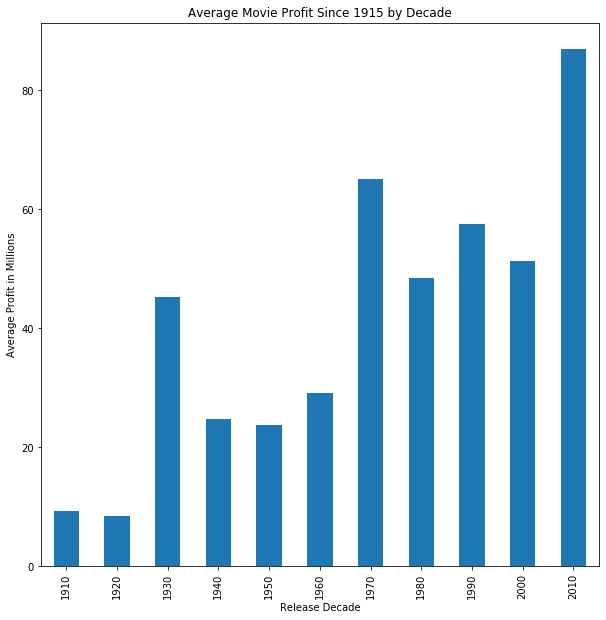

In [18]:
#Plotting average profit over time

Profit_over_time = (Grossing_movies.groupby(['decade'])['total_profit'].mean())/1000000
Profit_over_time

Profit_over_time.plot(kind='bar',figsize=(10,10))
plt.xlabel('Release Decade')
plt.ylabel('Average Profit in Millions')
plt.title('Average Movie Profit Since 1915 by Decade')
plt.ticklabel_format(style='plain', axis='y') #prevent scientific notation (no longer necessary since we're dividing the mean by millions)

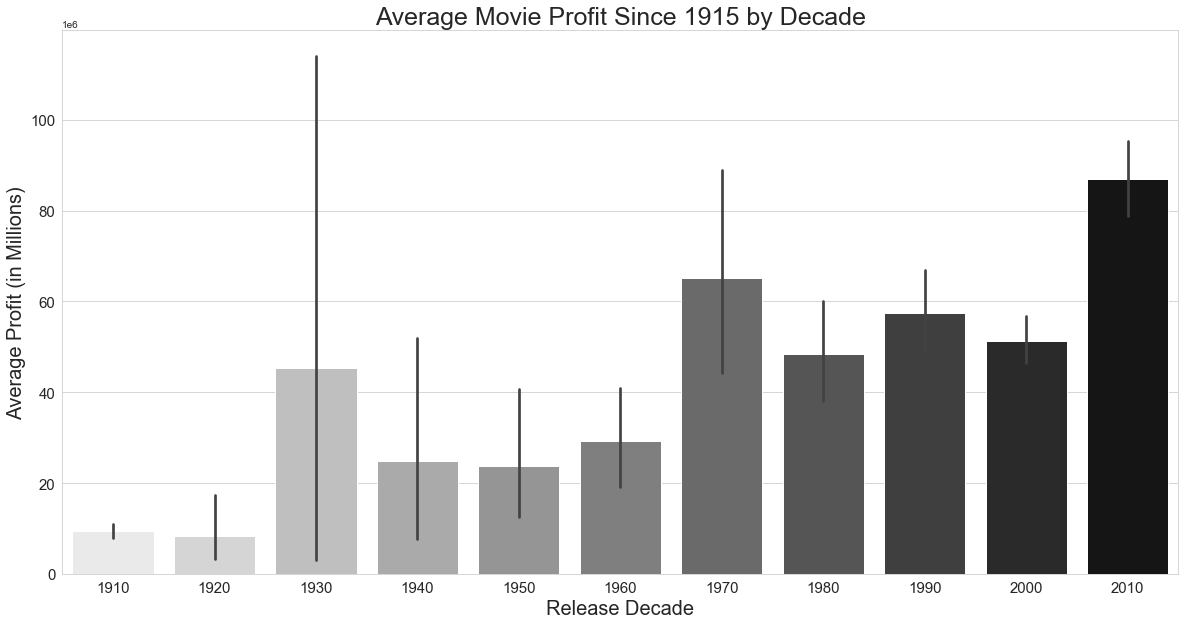

In [19]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=Grossing_movies,x='decade',y='total_profit',palette='gray_r')
sns.set(font="Helvetica")
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Movie Profit Since 1915 by Decade',fontsize=25)
plt.xlabel('Release Decade',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.show()



#revere color map: https://stackoverflow.com/questions/47461506/how-to-invert-color-of-seaborn-heatmap-colorbar

## Profit in the Last Decade

In [20]:
#Creating new dataframe 

Last_decade_gross = Grossing_movies.loc[Grossing_movies['decade']==2010]
Last_decade_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010


Text(0.5, 1.0, 'Average Movie Profit Since 2010 by Year')

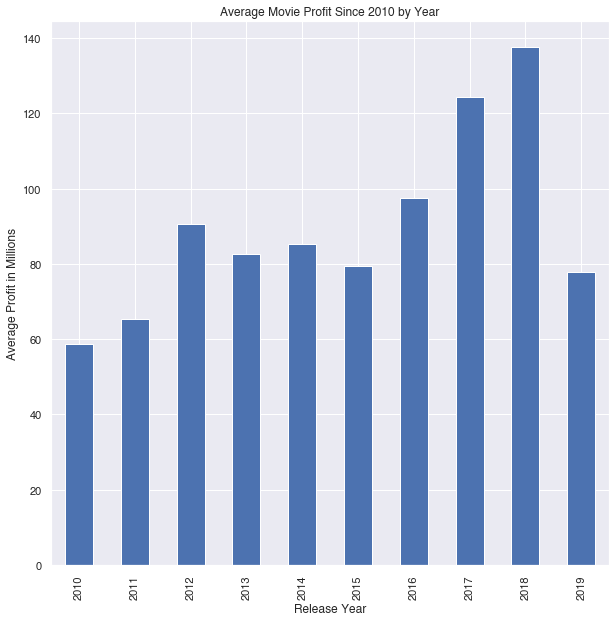

In [21]:
Last_decade_gross_group = (Last_decade_gross.groupby(['release_year'])['total_profit'].mean())/1000000
Last_decade_gross_group.plot(kind='bar',figsize=(10,10))
plt.xlabel('Release Year')
plt.ylabel('Average Profit in Millions')
plt.title('Average Movie Profit Since 2010 by Year')

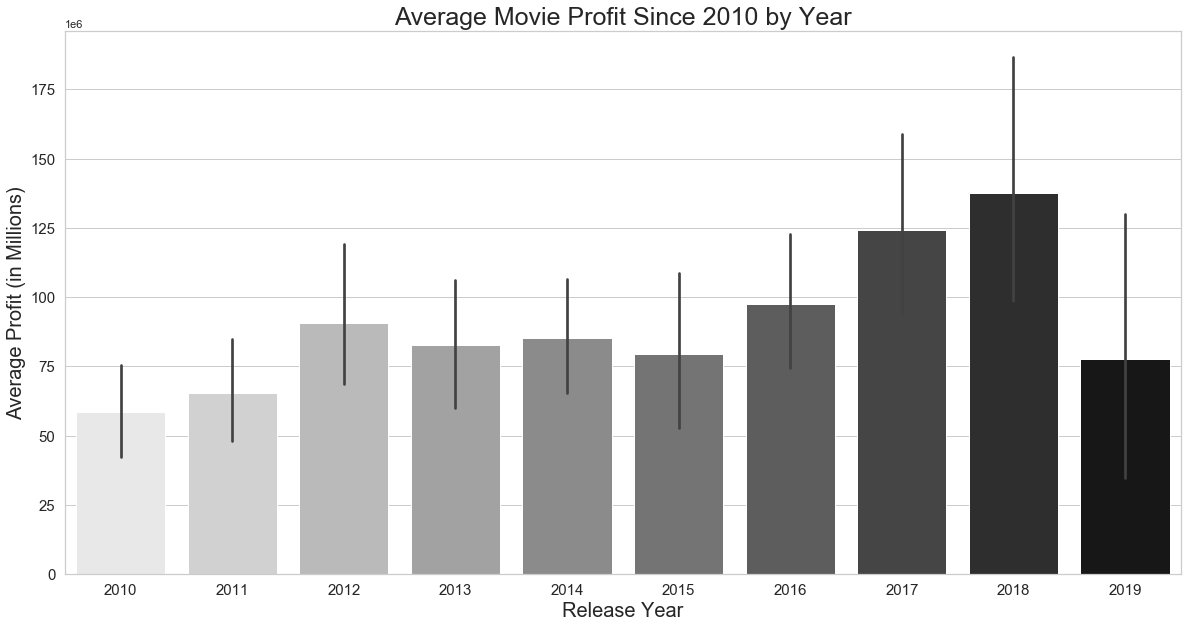

In [22]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=Last_decade_gross,x='release_year',y='total_profit',palette='gray_r')
sns.set(font="Helvetica")
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Movie Profit Since 2010 by Year',fontsize=25)
plt.xlabel('Release Year',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='y')
plt.show()

In [23]:
Last_decade_gross['release_year'].value_counts()

2010    258
2015    242
2011    241
2013    212
2014    207
2012    207
2016    204
2017    162
2018    140
2019     49
Name: release_year, dtype: int64

In [24]:
(Last_decade_gross['release_year'][Last_decade_gross['total_profit'] < 0].value_counts())/(Last_decade_gross['release_year'].value_counts())
                  
        

2010    0.341085
2011    0.331950
2012    0.270531
2013    0.292453
2014    0.338164
2015    0.404959
2016    0.279412
2017    0.240741
2018    0.242857
2019    0.306122
Name: release_year, dtype: float64

Potential Reasons for decrease in 2019:

- Limited sample size, especially compared to the other years
- "Cord cutters" are a growing group of consumers, giving rise to more direct to streaming movies and people skipping the box office. This data does not include data around views/profits from these platforms (i.e, Netflix,Hulu,Amazon Prime Video, etc)
- Next steps 

# Last Decade

In [25]:
pip install tmdbsimple

Note: you may need to restart the kernel to use updated packages.


In [26]:
import tmdbsimple as tmdb
tmdb.API_KEY = 'dad396248d0ec2a32944e1a50e0e4781'

## Mapping Names to IDs in TMDB

In [27]:
Last_decade_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010
...,...,...,...,...,...,...,...,...,...
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010
5744,45,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010
5748,49,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010


In [28]:
#Checking for duplicate names.  

Last_decade_gross['movie'].value_counts()

The Square           2
Robin Hood           2
The Accountant       1
The Nut Job          1
Sleight              1
                    ..
Eddie the Eagle      1
Coco                 1
American Honey       1
The Babadook         1
Bohemian Rhapsody    1
Name: movie, Length: 1920, dtype: int64

In [29]:
#Duplicate names are differentiated by release year.  

Last_decade_gross[Last_decade_gross['movie']=='The Square']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
5009,10,"Apr 9, 2010",The Square,1900000,406216,740932,-1159068,2010,2010
5099,100,"Oct 25, 2013",The Square,1500000,124244,176262,-1323738,2013,2010


In [30]:
Last_decade_gross[Last_decade_gross['movie']=='Robin Hood']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade
38,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006,112459006,2010,2010
408,9,"Nov 21, 2018",Robin Hood,99000000,30824628,84747441,-14252559,2018,2010


In [31]:
#ID column is not unique

[Last_decade_gross['id'].value_counts()]

[51    27
 81    27
 52    26
 39    26
 54    25
       ..
 30    13
 89    13
 5     13
 65    13
 87    12
 Name: id, Length: 100, dtype: int64]

In [32]:
# Create unique identifier using movie and release year

Last_decade_gross['unique'] = Last_decade_gross["release_year"].astype(str) + "," + Last_decade_gross["movie"]

Last_decade_gross

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"2011,Pirates of the Caribbean: On Stranger Tides"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"2019,Dark Phoenix"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"2015,Avengers: Age of Ultron"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens"
...,...,...,...,...,...,...,...,...,...,...
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"2010,Down Terrace"
5744,45,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,"2017,Emily"
5748,49,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,"2015,Exeter"
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,"2010,Breaking Upwards"


In [33]:
#Creating a list of unique titles and release years to loop through. 

movie_unique = list(Last_decade_gross['unique'])

In [34]:
movie_unique[0][0:4]

'2011'

In [35]:
movie_unique[0][5:]

'Pirates of the Caribbean: On Stranger Tides'

In [36]:
len(movie_unique)

1922

In [37]:
#Going to use this data to find categorical data, so much of the cetegorical information we'll use to pull from it will be similar. 

search = tmdb.Search()
tmdb_ids = []
errors = []
items = 0


for movie in movie_unique:
    items += 1
    print(items)
    yr = (movie[0:4])
    name = (movie[5:])
    try:
        response = search.movie(query = name,year=yr)
        tmdb_ids.append(search.results[0]['id'])
    except: 
        tmdb_ids.append('Missing')
        errors.append(movie)
    if items == len(movie_unique):
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922


In [38]:
len(tmdb_ids)

1922

In [39]:
Last_decade_gross['tmdb_ids'] = tmdb_ids
Last_decade_gross[Last_decade_gross['tmdb_ids'] == 'Missing']

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",Missing
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",Missing
175,76,"May 10, 2019",PokÃ©mon: Detective Pikachu,150000000,139507806,411258433,261258433,2019,2010,"2019,PokÃ©mon: Detective Pikachu",Missing
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,2010,"2011,Harry Potter and the Deathly Hallows: Part II",Missing
279,80,"Dec 21, 2016",Assassinâs Creed,125000000,54647948,240759682,115759682,2016,2010,"2016,Assassinâs Creed",Missing
...,...,...,...,...,...,...,...,...,...,...,...
5701,2,"Jul 17, 2015",Dawn of the Crescent Moon,75000,8799,8799,-66201,2015,2010,"2015,Dawn of the Crescent Moon",Missing
5710,11,"Jan 25, 2013",Supporting Characters,60000,4917,4917,-55083,2013,2010,"2013,Supporting Characters",Missing
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"2010,Down Terrace",Missing
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,"2010,Breaking Upwards",Missing


In [40]:
len(errors)

123

In [41]:
#Many errors being caused due to special characters

errors

['2017,Star Wars Ep. VIII: The Last Jedi',
 '2015,Star Wars Ep. VII: The Force Awakens',
 '2019,PokÃ©mon: Detective Pikachu',
 '2011,Harry Potter and the Deathly Hallows: Part II',
 '2016,Assassinâ\x80\x99s Creed',
 '2016,The Huntsman: Winterâ\x80\x99s War',
 '2016,Miss Peregrineâ\x80\x99s Home for Peculiar Children',
 '2012,Jin lÃ\xadng shÃ\xad san chai',
 '2018,Spider-Man: Into The Spider-Verse 3D',
 '2012,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©',
 '2019,Renegades',
 '2018,Dr. Seussâ\x80\x99 The Grinch',
 '2018,Oceanâ\x80\x99s 8',
 '2017,Daddyâ\x80\x99s Home 2',
 '2014,Legends of Oz: Dorothyâ\x80\x99s Return',
 "2012,Doctor Seuss' The Lorax",
 '2016,Peteâ\x80\x99s Dragon',
 '2019,A Dogâ\x80\x99s Way Home',
 '2014,Winterâ\x80\x99s Tale',
 "2011,Mr. Poppers's Penguins",
 '2015,Daddyâ\x80\x99s Home',
 '2018,The Girl in the Spiderâ\x80\x99s Web',
 "2015,Pourquoi j'ai pas mangÃ© mon pÃ¨re",
 '2016,Billy Lynnâ\x80\x99s Long Halftime Walk',
 '2016,Yip Man 3',
 '2017,Queen of the Dese

In [42]:
replacements = [('Ã©','é'),
                ("\x80\x80\x99","'"),
                ("â\x80\x99","'"),
                 ('Ãª','ê'),
                 ('â\x80¦','...'),
                 ('â\x80\x99'','''),
                 ('Ã¡','á'),
                 ('Ã¨','è'),
                 ('Ã','à'),
                 ('Âº','º'),
                 ('\\',"'"),
                 ('à¸','ø'),
                 ('à§','ç'),
                 ('Ep.','Episode'),
                 ('à³','ó'),
                 ('à¹','ù'),
                 ('2Â½','2½'),
                 ('à¤','ä'),
                 ('à¬','ì'),
                 ('à»','û'),
                 ('à\\x','í'),
                 ('à«','ë'),
                 ('â\x80\x93','-'),
                 ('à¥','å'),
                 ('Part II','Part 2') ]

In [43]:
def clean_movie(data):
        for a in replacements:
            data = data.replace(a[0], a[1])
        return data

In [44]:
#test formula

print(errors[2][5:])
print(clean_movie(errors[2][5:]))

PokÃ©mon: Detective Pikachu
Pokémon: Detective Pikachu


In [45]:
errors_replacements = []
errors_replacements_ids = []

for movie in errors:
    errors_replacements.append(clean_movie(movie[5:]))
    errors_replacements_ids.append(movie)

In [46]:
len(errors_replacements) == len(errors)

True

In [47]:
errors_replacements

['Star Wars Episode VIII: The Last Jedi',
 'Star Wars Episode VII: The Force Awakens',
 'Pokémon: Detective Pikachu',
 'Harry Potter and the Deathly Hallows: Part 2',
 "Assassin's Creed",
 "The Huntsman: Winter's War",
 "Miss Peregrine's Home for Peculiar Children",
 'Jin là\xadng shà\xad san chai',
 'Spider-Man: Into The Spider-Verse 3D',
 'Astérix et Obélix: Au service de Sa Majesté',
 'Renegades',
 "Dr. Seuss' The Grinch",
 "Ocean's 8",
 "Daddy's Home 2",
 "Legends of Oz: Dorothy's Return",
 "Doctor Seuss' The Lorax",
 "Pete's Dragon",
 "A Dog's Way Home",
 "Winter's Tale",
 "Mr. Poppers's Penguins",
 "Daddy's Home",
 "The Girl in the Spider's Web",
 "Pourquoi j'ai pas mangé mon père",
 "Billy Lynn's Long Halftime Walk",
 'Yip Man 3',
 'Queen of the Desert',
 "Bridget Jones's Baby",
 "Isn't it Romantic",
 "The Hitman's Bodyguard",
 "Molly's Game",
 'Grace of Monaco',
 'Savva. Serdtse voyna',
 "Rules Don't Apply",
 "New Year's Eve",
 "A Dog's Purpose",
 "Mother's Day",
 'Yi ge ren de

In [48]:
errors_replacements_ids

['2017,Star Wars Ep. VIII: The Last Jedi',
 '2015,Star Wars Ep. VII: The Force Awakens',
 '2019,PokÃ©mon: Detective Pikachu',
 '2011,Harry Potter and the Deathly Hallows: Part II',
 '2016,Assassinâ\x80\x99s Creed',
 '2016,The Huntsman: Winterâ\x80\x99s War',
 '2016,Miss Peregrineâ\x80\x99s Home for Peculiar Children',
 '2012,Jin lÃ\xadng shÃ\xad san chai',
 '2018,Spider-Man: Into The Spider-Verse 3D',
 '2012,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©',
 '2019,Renegades',
 '2018,Dr. Seussâ\x80\x99 The Grinch',
 '2018,Oceanâ\x80\x99s 8',
 '2017,Daddyâ\x80\x99s Home 2',
 '2014,Legends of Oz: Dorothyâ\x80\x99s Return',
 "2012,Doctor Seuss' The Lorax",
 '2016,Peteâ\x80\x99s Dragon',
 '2019,A Dogâ\x80\x99s Way Home',
 '2014,Winterâ\x80\x99s Tale',
 "2011,Mr. Poppers's Penguins",
 '2015,Daddyâ\x80\x99s Home',
 '2018,The Girl in the Spiderâ\x80\x99s Web',
 "2015,Pourquoi j'ai pas mangÃ© mon pÃ¨re",
 '2016,Billy Lynnâ\x80\x99s Long Halftime Walk',
 '2016,Yip Man 3',
 '2017,Queen of the Dese

In [49]:
#Creating a dataframe to map the original and fixed names. 

errors_dict = {'unique':errors_replacements_ids,'fixed':errors_replacements}
errors_df = pd.DataFrame(errors_dict)
errors_df

,unique,fixed
0,"2017,Star Wars Ep. VIII: The Last Jedi",Star Wars Episode VIII: The Last Jedi
1,"2015,Star Wars Ep. VII: The Force Awakens",Star Wars Episode VII: The Force Awakens
2,"2019,PokÃ©mon: Detective Pikachu",Pokémon: Detective Pikachu
3,"2011,Harry Potter and the Deathly Hallows: Part II",Harry Potter and the Deathly Hallows: Part 2
4,"2016,Assassinâs Creed",Assassin's Creed
...,...,...
118,"2015,Dawn of the Crescent Moon",Dawn of the Crescent Moon
119,"2013,Supporting Characters",Supporting Characters
120,"2010,Down Terrace",Down Terrace
121,"2010,Breaking Upwards",Breaking Upwards


In [50]:
#Looping through the corrected names to try to find the IDs again

search = tmdb.Search()
fixed_ids = []
errors_after_name_update = []
items = 0


for movie in errors_df['fixed']:
    items += 1
    print(items)
    try:
        response = search.movie(query = movie)
        fixed_ids.append(search.results[0]['id'])
    except: 
        fixed_ids.append('Missing')
        errors_after_name_update.append(movie)
    if items == len(errors_df['fixed']):
        break

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123


In [51]:
len(fixed_ids) == len(errors_df['fixed'])

True

In [52]:
#adding the ids to the dataframe

errors_df['fixed_ids'] = fixed_ids
errors_df

,unique,fixed,fixed_ids
0,"2017,Star Wars Ep. VIII: The Last Jedi",Star Wars Episode VIII: The Last Jedi,181808
1,"2015,Star Wars Ep. VII: The Force Awakens",Star Wars Episode VII: The Force Awakens,140607
2,"2019,PokÃ©mon: Detective Pikachu",Pokémon: Detective Pikachu,447404
3,"2011,Harry Potter and the Deathly Hallows: Part II",Harry Potter and the Deathly Hallows: Part 2,12445
4,"2016,Assassinâs Creed",Assassin's Creed,121856
...,...,...,...
118,"2015,Dawn of the Crescent Moon",Dawn of the Crescent Moon,326576
119,"2013,Supporting Characters",Supporting Characters,139998
120,"2010,Down Terrace",Down Terrace,42151
121,"2010,Breaking Upwards",Breaking Upwards,44990


In [53]:
#Reduced Missing values to 13. Dropping these (<1% of Last_decade_gross)

errors_df[errors_df['fixed_ids']=='Missing'].shape

(13, 3)

In [54]:
errors_df[errors_df['fixed_ids']=='Missing']

,unique,fixed,fixed_ids
7,"2012,Jin lÃ­ng shÃ­ san chai",Jin là­ng shà­ san chai,Missing
8,"2018,Spider-Man: Into The Spider-Verse 3D",Spider-Man: Into The Spider-Verse 3D,Missing
15,"2012,Doctor Seuss' The Lorax",Doctor Seuss' The Lorax,Missing
19,"2011,Mr. Poppers's Penguins",Mr. Poppers's Penguins,Missing
31,"2016,Savva. Serdtse voyna",Savva. Serdtse voyna,Missing
38,"2017,ChÄi dÃ n zhuÄnjiÄ",ChÄi dà n zhuÄnjiÄ,Missing
42,"2017,JÃ¬yÃ¬ dÃ shÄ«",Jìyì dà shÄ«,Missing
51,"2010,San suk si gin",San suk si gin,Missing
57,"2015,San cheng ji",San cheng ji,Missing
62,"2019,PMC: deo beong-keo",PMC: deo beong-keo,Missing


In [55]:
#Creatings new df where the missing data is not included

no_missing = errors_df[errors_df['fixed_ids']!='Missing']
no_missing = no_missing.reset_index(drop=True)
no_missing.head()

,unique,fixed,fixed_ids
0,"2017,Star Wars Ep. VIII: The Last Jedi",Star Wars Episode VIII: The Last Jedi,181808
1,"2015,Star Wars Ep. VII: The Force Awakens",Star Wars Episode VII: The Force Awakens,140607
2,"2019,PokÃ©mon: Detective Pikachu",Pokémon: Detective Pikachu,447404
3,"2011,Harry Potter and the Deathly Hallows: Part II",Harry Potter and the Deathly Hallows: Part 2,12445
4,"2016,Assassinâs Creed",Assassin's Creed,121856


In [56]:
Last_decade_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"2011,Pirates of the Caribbean: On Stranger Tides",1865
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"2019,Dark Phoenix",320288
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"2015,Avengers: Age of Ultron",99861
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",Missing
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",Missing


In [57]:
errors_df.head()

,unique,fixed,fixed_ids
0,"2017,Star Wars Ep. VIII: The Last Jedi",Star Wars Episode VIII: The Last Jedi,181808
1,"2015,Star Wars Ep. VII: The Force Awakens",Star Wars Episode VII: The Force Awakens,140607
2,"2019,PokÃ©mon: Detective Pikachu",Pokémon: Detective Pikachu,447404
3,"2011,Harry Potter and the Deathly Hallows: Part II",Harry Potter and the Deathly Hallows: Part 2,12445
4,"2016,Assassinâs Creed",Assassin's Creed,121856


In [58]:
#Replace items from errors into Last Decade 

In [59]:
#Dictionary with IDs

found_tmdb = dict(zip(errors_df['unique'],errors_df['fixed_ids']))
len(found_tmdb)
found_tmdb

{'2017,Star Wars Ep. VIII: The Last Jedi': 181808,
 '2015,Star Wars Ep. VII: The Force Awakens': 140607,
 '2019,PokÃ©mon: Detective Pikachu': 447404,
 '2011,Harry Potter and the Deathly Hallows: Part II': 12445,
 '2016,Assassinâ\x80\x99s Creed': 121856,
 '2016,The Huntsman: Winterâ\x80\x99s War': 290595,
 '2016,Miss Peregrineâ\x80\x99s Home for Peculiar Children': 283366,
 '2012,Jin lÃ\xadng shÃ\xad san chai': 'Missing',
 '2018,Spider-Man: Into The Spider-Verse 3D': 'Missing',
 '2012,AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©': 99770,
 '2019,Renegades': 335788,
 '2018,Dr. Seussâ\x80\x99 The Grinch': 570602,
 '2018,Oceanâ\x80\x99s 8': 402900,
 '2017,Daddyâ\x80\x99s Home 2': 419680,
 '2014,Legends of Oz: Dorothyâ\x80\x99s Return': 59981,
 "2012,Doctor Seuss' The Lorax": 'Missing',
 '2016,Peteâ\x80\x99s Dragon': 294272,
 '2019,A Dogâ\x80\x99s Way Home': 508763,
 '2014,Winterâ\x80\x99s Tale': 137321,
 "2011,Mr. Poppers's Penguins": 'Missing',
 '2015,Daddyâ\x80\x99s Home': 274167,
 '201

In [60]:
len(Last_decade_gross['tmdb_ids'][Last_decade_gross["tmdb_ids"]=='Missing'])

123

In [61]:
Last_decade_gross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"2011,Pirates of the Caribbean: On Stranger Tides",1865
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"2019,Dark Phoenix",320288
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"2015,Avengers: Age of Ultron",99861
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",Missing
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",Missing


In [62]:
Last_decade_gross[Last_decade_gross["tmdb_ids"]=='Missing']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",Missing
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",Missing
175,76,"May 10, 2019",PokÃ©mon: Detective Pikachu,150000000,139507806,411258433,261258433,2019,2010,"2019,PokÃ©mon: Detective Pikachu",Missing
260,61,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,125000000,381193157,1341693157,1216693157,2011,2010,"2011,Harry Potter and the Deathly Hallows: Part II",Missing
279,80,"Dec 21, 2016",Assassinâs Creed,125000000,54647948,240759682,115759682,2016,2010,"2016,Assassinâs Creed",Missing
...,...,...,...,...,...,...,...,...,...,...,...
5701,2,"Jul 17, 2015",Dawn of the Crescent Moon,75000,8799,8799,-66201,2015,2010,"2015,Dawn of the Crescent Moon",Missing
5710,11,"Jan 25, 2013",Supporting Characters,60000,4917,4917,-55083,2013,2010,"2013,Supporting Characters",Missing
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"2010,Down Terrace",Missing
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,"2010,Breaking Upwards",Missing


In [63]:
# df['country'] = df.country.where(df.country != 'unknown', df.city.map(city2country_mapping))
# Last_decade_gross['unique'] = 

Last_decade_gross["tmdb_ids"][Last_decade_gross["tmdb_ids"]=='Missing'] =  Last_decade_gross["unique"].map(found_tmdb)



/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas

In [64]:
Last_decade_gross['movie'][Last_decade_gross["tmdb_ids"]=='Missing']

405                  Jin lÃ­ng shÃ­ san chai
443     Spider-Man: Into The Spider-Verse 3D
762                  Doctor Seuss' The Lorax
1008                  Mr. Poppers's Penguins
2008                    Savva. Serdtse voyna
2398                   ChÄi dÃ n zhuÄnjiÄ
2694                          JÃ¬yÃ¬ dÃ shÄ«
3158                          San suk si gin
3449                            San cheng ji
3531                      PMC: deo beong-keo
4461                          Airlift (2016)
5497    Siakh lokhamim: ha'slilim ha'gnouzim
5659              Antarctic Edge: 70Âº South
Name: movie, dtype: object

In [65]:
errors_df['fixed'][errors_df['fixed_ids']=='Missing']

7                   Jin là­ng shà­ san chai
8      Spider-Man: Into The Spider-Verse 3D
15                  Doctor Seuss' The Lorax
19                   Mr. Poppers's Penguins
31                     Savva. Serdtse voyna
38                    ChÄi dà n zhuÄnjiÄ
42                             Jìyì dà shÄ«
51                           San suk si gin
57                             San cheng ji
62                       PMC: deo beong-keo
86                           Airlift (2016)
110    Siakh lokhamim: ha'slilim ha'gnouzim
117               Antarctic Edge: 70º South
Name: fixed, dtype: object

In [66]:
Last_decade_gross[Last_decade_gross["tmdb_ids"]!='Missing']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"2011,Pirates of the Caribbean: On Stranger Tides",1865
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"2019,Dark Phoenix",320288
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"2015,Avengers: Age of Ultron",99861
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",181808
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",140607
...,...,...,...,...,...,...,...,...,...,...,...
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"2010,Down Terrace",42151
5744,45,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,"2017,Emily",446397
5748,49,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,"2015,Exeter",226458
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,"2010,Breaking Upwards",44990


In [67]:
1922-13

1909

In [68]:
#Dropping 13 missing

Last_decade_gross = Last_decade_gross[Last_decade_gross["tmdb_ids"]!='Missing']

In [69]:
#Checking for null values

Last_decade_gross.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
total_profit         0
release_year         0
decade               0
unique               0
tmdb_ids             0
dtype: int64

In [70]:
Last_decade_gross

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,unique,tmdb_ids
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"2011,Pirates of the Caribbean: On Stranger Tides",1865
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"2019,Dark Phoenix",320288
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"2015,Avengers: Age of Ultron",99861
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"2017,Star Wars Ep. VIII: The Last Jedi",181808
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"2015,Star Wars Ep. VII: The Force Awakens",140607
...,...,...,...,...,...,...,...,...,...,...,...
5740,41,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"2010,Down Terrace",42151
5744,45,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,"2017,Emily",446397
5748,49,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,"2015,Exeter",226458
5760,61,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,"2010,Breaking Upwards",44990


In [71]:
#Dropping id and unique columns. No longer needed. 

Last_decade_gross.drop(['id','unique'],axis=1,inplace=True)

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [72]:
Last_decade_gross.reset_index(drop=True)
Last_decade_gross

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,181808
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607
...,...,...,...,...,...,...,...,...,...
5740,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,42151
5744,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,446397
5748,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,226458
5760,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,44990


# Adding Genres and Ratings Data

## Using IDs to find Genres and Ratings

In [73]:
Last_decade_gross.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,181808
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607


In [74]:
#Using IDs to look up genres and certifications/ratings from TMDB

count = 0

genre_names = []
ratings_list = []

for m in Last_decade_gross['tmdb_ids']:
    
    count += 1
    print(count)
    
    #genres
    movie_genre = []
    movie = tmdb.Movies(m)
    response = movie.info()
    response = response['genres']
    for g in response:
        movie_genre.append(g['name'])
    genre_names.append(movie_genre)
    
    #ratings
    grouped_ratings = []
    response = movie.releases()
    movie.countries
    for c in movie.countries:
        if c['iso_3166_1'] == 'US':
            grouped_ratings.append((c['certification']))
    unique = sorted(set(grouped_ratings))
    unique = [x for x in unique if len(x.strip()) > 0]
    if len(unique) == 0:
        unique.append('Not Rated')
    ratings_list.append(unique)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909


In [75]:
print(len(genre_names))

1909


In [76]:
print(len(genre_names))

1909


In [77]:
print(len(ratings_list))

1909


In [78]:
#Adding values to dataframes as new columns

Last_decade_gross['Genres'] = genre_names
Last_decade_gross['Ratings'] = ratings_list

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [79]:
Last_decade_gross.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]",[PG-13]
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]",[PG-13]
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]",[PG-13]
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,181808,"[Science Fiction, Action, Adventure]",[PG-13]
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,"[Action, Adventure, Science Fiction, Fantasy]",[PG-13]


## Cleaning Ratings Data

In [80]:
#Checking what unique values we have

unique_ratings = [] 
for x in Last_decade_gross.Ratings:
    if x not in unique_ratings: 
            unique_ratings.append(x)
unique_ratings

[['PG-13'],
 ['PG'],
 ['PG-13', 'R'],
 ['G'],
 ['R'],
 ['Not Rated'],
 ['NR'],
 ['NC-17'],
 ['NR', 'R'],
 ['NR', 'PG-13']]

In [81]:
#Consolidating all ratings to one value

In [82]:
#Converting values from lists to strings so that we can easily work with them

ratings_list
new_ratings_list = []
for rating in ratings_list:
    new_ratings_list.append(str(rating))

In [83]:
type(new_ratings_list[0])

str

In [84]:
unique_ratings = [] 
for x in new_ratings_list:
    if x not in unique_ratings: 
            unique_ratings.append(x)
unique_ratings

["['PG-13']",
 "['PG']",
 "['PG-13', 'R']",
 "['G']",
 "['R']",
 "['Not Rated']",
 "['NR']",
 "['NC-17']",
 "['NR', 'R']",
 "['NR', 'PG-13']"]

In [85]:
#Replace ratings with string version of the list

Last_decade_gross['Ratings'] = new_ratings_list
Last_decade_gross

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,1865,"[Adventure, Action, Fantasy]",['PG-13']
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,320288,"[Science Fiction, Action, Adventure]",['PG-13']
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,99861,"[Action, Adventure, Science Fiction]",['PG-13']
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,181808,"[Science Fiction, Action, Adventure]",['PG-13']
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,140607,"[Action, Adventure, Science Fiction, Fantasy]",['PG-13']
...,...,...,...,...,...,...,...,...,...,...,...
5740,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,42151,"[Drama, Action, Comedy]",['Not Rated']
5744,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,446397,[Drama],['Not Rated']
5748,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,226458,"[Thriller, Horror]",['Not Rated']
5760,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,44990,"[Comedy, Romance]",['Not Rated']


In [86]:
#Checking unique values again

list(Last_decade_gross['Ratings'].unique())

["['PG-13']",
 "['PG']",
 "['PG-13', 'R']",
 "['G']",
 "['R']",
 "['Not Rated']",
 "['NR']",
 "['NC-17']",
 "['NR', 'R']",
 "['NR', 'PG-13']"]

In [87]:
#Replacing all ratings with more than one value that includes NR

list(Last_decade_gross['Ratings'][Last_decade_gross['Ratings'].str.contains("\['NR',")].unique())

["['NR', 'R']", "['NR', 'PG-13']"]

In [88]:
#Replacing all entries with two ratings where one of them is NR with just the original rating

Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['NR', 'PG-13']"] = "['PG-13']"
Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['NR', 'R']"] = "['R']"

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [89]:
#Now to isolate all other entries with 2 ratings

list(Last_decade_gross['Ratings'].unique())

["['PG-13']",
 "['PG']",
 "['PG-13', 'R']",
 "['G']",
 "['R']",
 "['Not Rated']",
 "['NR']",
 "['NC-17']"]

In [90]:
Last_decade_gross[Last_decade_gross['Ratings'].str.contains(",")]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
17,"Mar 25, 2016",Batman v Superman: Dawn of Justice,250000000,330360194,867500281,617500281,2016,2010,209112,"[Action, Adventure, Fantasy]","['PG-13', 'R']"
314,"May 18, 2018",Deadpool 2,110000000,324591735,786680557,676680557,2018,2010,383498,"[Action, Comedy, Adventure]","['PG-13', 'R']"


In [91]:
#Manually re-assinging this based on tmdb default on movie page

#https://www.themoviedb.org/movie/209112-batman-v-superman-dawn-of-justice => PG-13
#https://www.themoviedb.org/movie/383498-deadpool-2?language=en-US => R

Last_decade_gross['Ratings'][Last_decade_gross['tmdb_ids']==209112] = "['PG-13']"
Last_decade_gross['Ratings'][Last_decade_gross['tmdb_ids']==383498] = "['R']"

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [92]:
list(Last_decade_gross['Ratings'].unique())

["['PG-13']",
 "['PG']",
 "['G']",
 "['R']",
 "['Not Rated']",
 "['NR']",
 "['NC-17']"]

In [93]:
#Spot checked a few of these at themoviedb.org and there is not a US rating. Updating to be NR

Last_decade_gross[Last_decade_gross['Ratings']== "['Not Rated']"]

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,tmdb_ids,Genres,Ratings
617,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,-16919875,2012,2010,99770,"[Family, Adventure, Comedy]",['Not Rated']
627,"Nov 9, 2018",Dr. Seussâ The Grinch,75000000,270620950,511002426,436002426,2018,2010,570602,[],['Not Rated']
1204,"Oct 2, 2015",Shanghai,50000000,46425,15505922,-34494078,2015,2010,348884,"[Romance, Action, Adventure, Comedy, Drama]",['Not Rated']
1368,"Dec 31, 2015",Pourquoi j'ai pas mangÃ© mon pÃ¨re,42000000,0,15451663,-26548337,2015,2010,280391,"[Adventure, Comedy, Animation]",['Not Rated']
1539,"Nov 11, 2016",USS Indianapolis: Men of Courage,40000000,0,1663785,-38336215,2016,2010,340945,"[Action, War]",['Not Rated']
...,...,...,...,...,...,...,...,...,...,...,...
5740,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,42151,"[Drama, Action, Comedy]",['Not Rated']
5744,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,446397,[Drama],['Not Rated']
5748,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,226458,"[Thriller, Horror]",['Not Rated']
5760,"Apr 2, 2010",Breaking Upwards,15000,115592,115592,100592,2010,2010,44990,"[Comedy, Romance]",['Not Rated']


In [94]:
Last_decade_gross['Ratings'][Last_decade_gross['Ratings'] == "['Not Rated']"] = "['NR']"

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
list(Last_decade_gross['Ratings'].unique())

["['PG-13']", "['PG']", "['G']", "['R']", "['NR']", "['NC-17']"]

## Cleaning Genres Data

In [96]:
#Checking what unique values we have

unique_genres = [] 
for x in Last_decade_gross.Genres:
    if x not in unique_genres: 
            unique_genres.append(x)
unique_genres

[['Adventure', 'Action', 'Fantasy'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Adventure', 'Action', 'Science Fiction'],
 ['Action', 'Adventure', 'Fantasy', 'Science Fiction'],
 ['Action', 'Adventure', 'Thriller'],
 ['Action', 'Crime', 'Drama', 'Thriller'],
 ['Adventure', 'Science Fiction'],
 ['Action', 'Adventure', 'Western'],
 ['Animation', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Adventure', 'Fantasy', 'Action'],
 ['Action', 'Crime', 'Thriller'],
 ['Adventure', 'Action', 'Fantasy', 'Comedy'],
 ['Thriller', 'Action', 'Adventure', 'Science Fiction'],
 ['Action', 'Science Fiction', 'Thriller', 'Adventure'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Drama'],
 ['Action', 'Adventure', 'Animation', 'Family'],
 ['Adventure', 'Animation', 'Comedy', 'Family'],
 ['Animation', 'Family', 'Comedy'],


In [97]:
genre_columns = list(Last_decade_gross.explode('Genres')['Genres'].unique())
genre_columns.pop()
genre_columns

['Adventure',
 'Action',
 'Fantasy',
 'Science Fiction',
 'Thriller',
 'Crime',
 'Drama',
 'Western',
 'Animation',
 'Family',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'War',
 'Music',
 'History',
 'Documentary']

In [98]:
Last_decade_gross[['tmdb_ids','Genres']]

,tmdb_ids,Genres
1,1865,"[Adventure, Action, Fantasy]"
2,320288,"[Science Fiction, Action, Adventure]"
3,99861,"[Action, Adventure, Science Fiction]"
4,181808,"[Science Fiction, Action, Adventure]"
5,140607,"[Action, Adventure, Science Fiction, Fantasy]"
...,...,...
5740,42151,"[Drama, Action, Comedy]"
5744,446397,[Drama]
5748,226458,"[Thriller, Horror]"
5760,44990,"[Comedy, Romance]"


In [99]:
Last_decade_gross['Genres'] = Last_decade_gross['Genres'].astype('str')

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
genre_df = pd.DataFrame()

for genre in genre_columns:
    genre_df[genre] = Last_decade_gross['Genres'].str.contains(genre).astype(int)
    

In [101]:
genre_df['tmdb_ids'] = Last_decade_gross['tmdb_ids']

In [102]:
Last_decade_gross = Last_decade_gross.set_index('tmdb_ids')
genre_df = genre_df.set_index('tmdb_ids')


In [103]:
genre_df

,Adventure,Action,Fantasy,Science Fiction,Thriller,Crime,Drama,Western,Animation,Family,Comedy,Romance,Horror,Mystery,War,Music,History,Documentary
tmdb_ids,,,,,,,,,,,,,,,,,,
1865,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
320288,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99861,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
181808,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140607,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42151,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
446397,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
226458,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [104]:
combined_df = pd.concat([Last_decade_gross,genre_df],axis=1)

# Profit by Genre

In [105]:
combined_df[combined_df['Comedy']==1].head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,Genres,Ratings,...,Animation,Family,Comedy,Romance,Horror,Mystery,War,Music,History,Documentary
tmdb_ids,,,,,,,,,,,,,,,,,,,,,
166426,"May 26, 2017",Pirates of the Caribbean: Dead Men Tell No Tales,230000000,172558876,788241137,558241137,2017,2010,"['Adventure', 'Action', 'Fantasy', 'Comedy']",['PG-13'],...,0,0,1,0,0,0,0,0,0,0
41154,"May 25, 2012",Men in Black 3,215000000,179020854,654213485,439213485,2012,2010,"['Action', 'Comedy', 'Science Fiction']",['PG-13'],...,0,0,1,0,0,0,0,0,0,0
127380,"Jun 17, 2016",Finding Dory,200000000,486295561,1021215193,821215193,2016,2010,"['Adventure', 'Animation', 'Comedy', 'Family']",['PG'],...,1,1,1,0,0,0,0,0,0,0
10193,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,868879522,2010,2010,"['Animation', 'Family', 'Comedy']",['G'],...,1,1,1,0,0,0,0,0,0,0
283995,"May 5, 2017",Guardians of the Galaxy Vol 2,200000000,389813101,862316233,662316233,2017,2010,"['Action', 'Adventure', 'Comedy', 'Science Fiction']",['PG-13'],...,0,0,1,0,0,0,0,0,0,0


In [106]:
profits = []
st_dev = []

for genre in genre_columns:
    profit = (combined_df[combined_df[genre]==1].groupby(genre)['total_profit'].mean()).values[0]
    profit = (profit/1000000).round(2)
    profits.append(profit)
    
    std = (combined_df[combined_df[genre]==1].groupby(genre)['total_profit'].std()).values[0]
    std = (std/1000000).round(2)
    st_dev.append(std)

    

In [107]:
profit_by_genre_millions = {'Genres':genre_columns,'Profits':profits,'Standard Deviation':st_dev}
profit_by_genre_millions = pd.DataFrame(profit_by_genre_millions)
profit_by_genre_millions.sort_values('Profits',ascending=False)
top_ten_genres = profit_by_genre_millions.sort_values('Profits',ascending=False).head(10)
top_ten_genres

,Genres,Profits,Standard Deviation
0,Adventure,244.79,318.54
8,Animation,213.27,267.52
2,Fantasy,206.26,280.39
3,Science Fiction,199.15,312.70
9,Family,178.66,250.14
1,Action,164.75,272.36
10,Comedy,82.36,155.72
4,Thriller,64.38,148.54
15,Music,56.35,140.41
13,Mystery,55.23,87.35


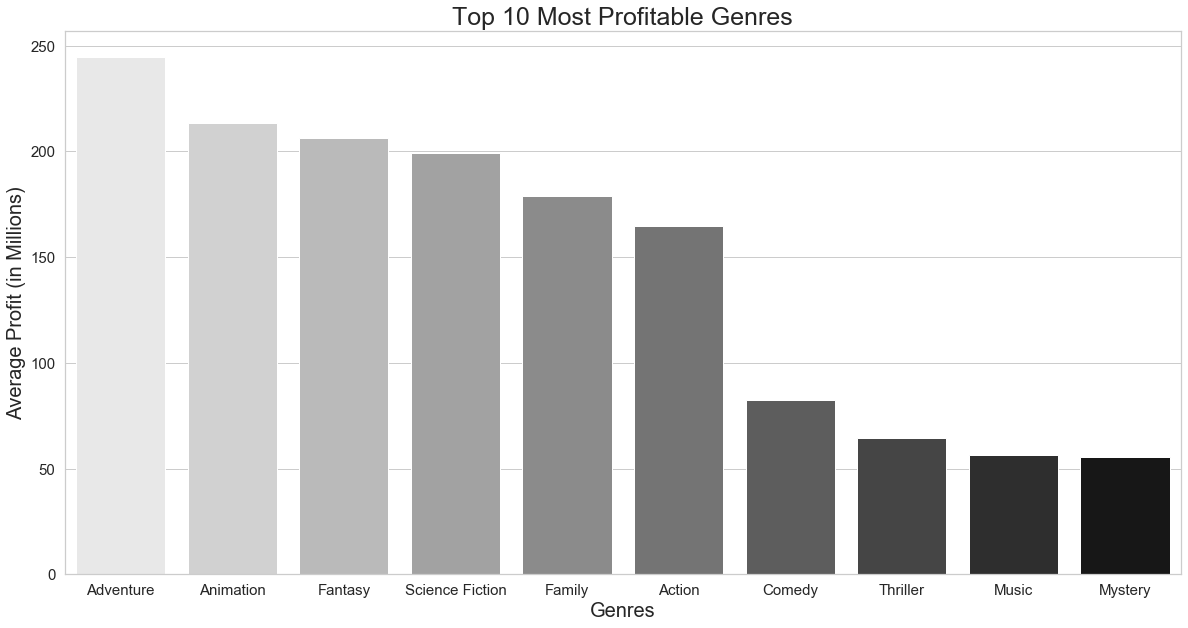

In [108]:
sns.set_style("whitegrid")


f, ax = plt.subplots(figsize=(20, 10))
sns.set(font="Helvetica")
sns.barplot(x="Genres", y="Profits", data=top_ten_genres,palette='gray_r');
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Top 10 Most Profitable Genres',fontsize=25)
plt.xlabel('Genres',fontsize=20)
plt.style.use("seaborn-darkgrid")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

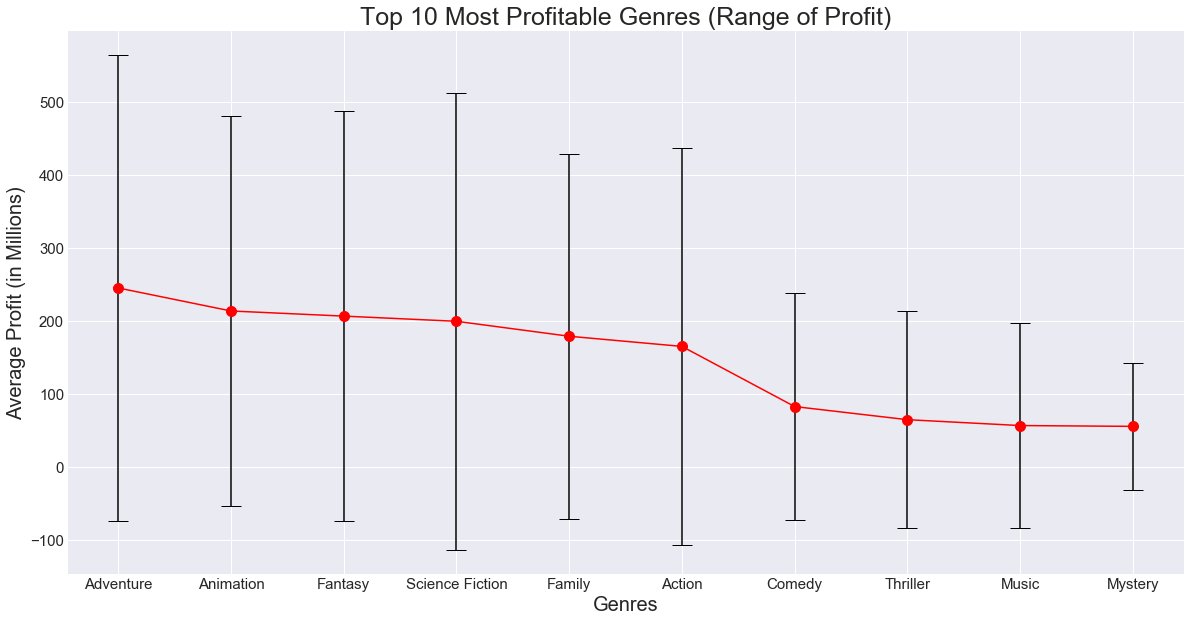

In [109]:
f, ax = plt.subplots(figsize=(20, 10))
sns.set_style('darkgrid')
plt.errorbar(top_ten_genres.Genres, top_ten_genres.Profits, yerr = top_ten_genres['Standard Deviation'],capsize=10,ecolor='black',marker='o',markersize=10,color='red') 
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Top 10 Most Profitable Genres (Range of Profit)',fontsize=25)
plt.xlabel('Genres',fontsize=20)
plt.style.use("seaborn-darkgrid")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


#Help guide: https://www.geeksforgeeks.org/matplotlib-pyplot-errorbar-in-python/

# Profit by Rating

In [110]:
Profit_by_rating = pd.DataFrame(((combined_df.groupby(['Ratings'])['total_profit'].mean())/1000000).round(2))
Profit_by_rating = Profit_by_rating.reset_index('Ratings')
Profit_by_rating = Profit_by_rating.sort_values('total_profit', ascending = False)
Profit_by_rating = Profit_by_rating.rename(columns={'total_profit' : 'Avg Profit'})
Profit_by_rating

,Ratings,Avg Profit
3,['PG'],158.77
4,['PG-13'],134.22
0,['G'],125.00
5,['R'],44.25
1,['NC-17'],15.79
2,['NR'],2.56


In [192]:
(Profit_by_rating['Avg Profit'][5]-Profit_by_rating['Avg Profit'][0])/Profit_by_rating['Avg Profit'][0]

-0.646

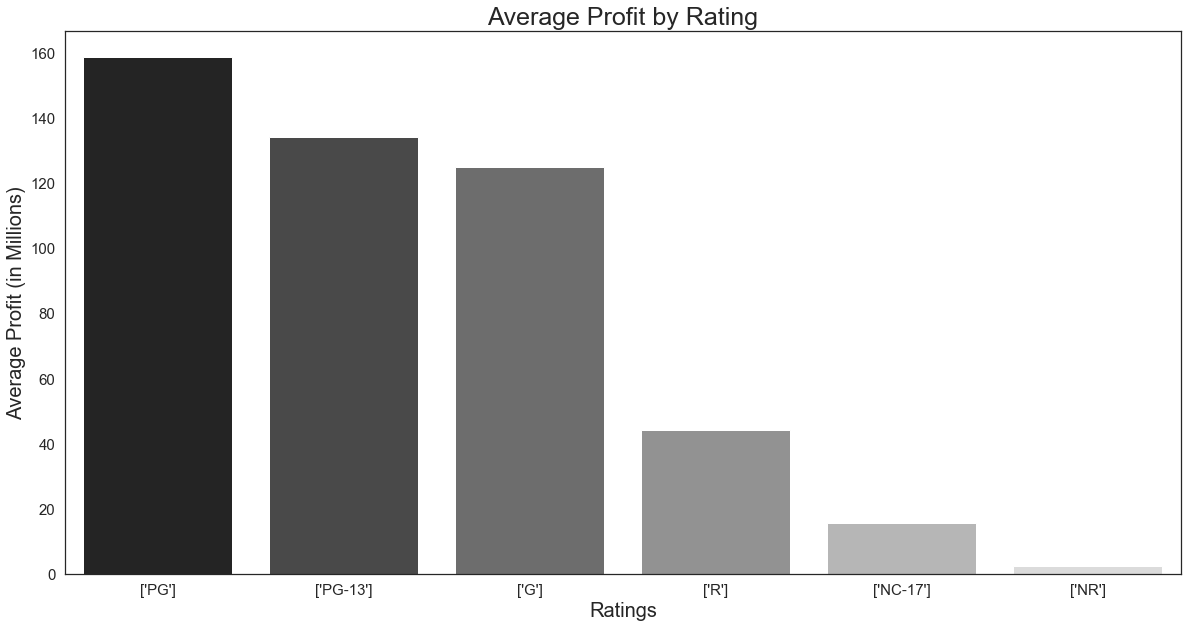

In [187]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="Ratings", y="Avg Profit",data=Profit_by_rating,palette='gray');
plt.ylabel('Average Profit (in Millions)',fontsize=20)
plt.title('Average Profit by Rating',fontsize=25)
plt.xlabel('Ratings',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [112]:
combined_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,Genres,Ratings,...,Animation,Family,Comedy,Romance,Horror,Mystery,War,Music,History,Documentary
tmdb_ids,,,,,,,,,,,,,,,,,,,,,
1865,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"['Adventure', 'Action', 'Fantasy']",['PG-13'],...,0,0,0,0,0,0,0,0,0,0
320288,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"['Science Fiction', 'Action', 'Adventure']",['PG-13'],...,0,0,0,0,0,0,0,0,0,0
99861,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"['Action', 'Adventure', 'Science Fiction']",['PG-13'],...,0,0,0,0,0,0,0,0,0,0
181808,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"['Science Fiction', 'Action', 'Adventure']",['PG-13'],...,0,0,0,0,0,0,0,0,0,0
140607,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"['Action', 'Adventure', 'Science Fiction', 'Fantasy']",['PG-13'],...,0,0,0,0,0,0,0,0,0,0


In [113]:
combined_df.Ratings.mode()

0    ['R']
dtype: object

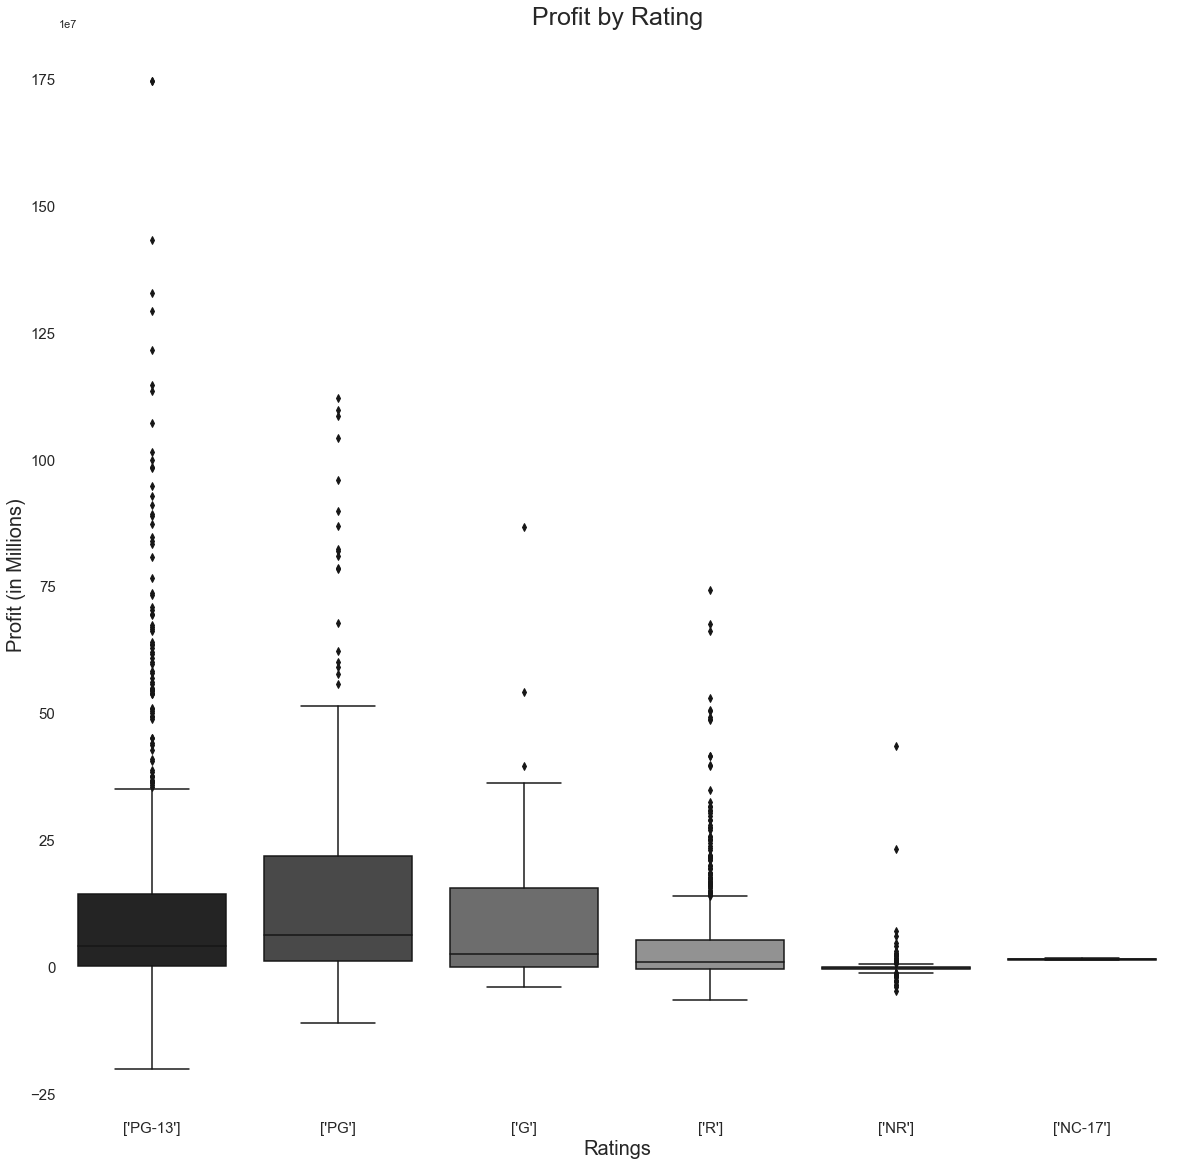

In [170]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x='Ratings', y='total_profit',data=combined_df,orient='v',palette='gray')
plt.ylabel('Profit (in Millions)',fontsize=20)
plt.title('Profit by Rating',fontsize=25)
plt.xlabel('Ratings',fontsize=20)
plt.style.use("seaborn-darkgrid")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (7,7), axis='y')
plt.show()

# Top 3 Genres v Ratings

In [115]:
Adventure_df = (combined_df[combined_df['Adventure']==1])
Animation_df = (combined_df[combined_df['Animation']==1])
Fantasy_df = (combined_df[combined_df['Fantasy']==1])

In [275]:
Adventure_df_by_rating = pd.DataFrame(((Adventure_df.groupby(['Ratings'])['total_profit'].mean())/1000000).round(2))
Adventure_df_by_rating = Adventure_df_by_rating.sort_values('total_profit',ascending=False)
Adventure_df_by_rating = Adventure_df_by_rating.reset_index('Ratings')
Adventure_df_by_rating

Animation_df_by_rating = pd.DataFrame(((Animation_df.groupby(['Ratings'])['total_profit'].mean())/1000000).round(2))
Animation_df_by_rating = Animation_df_by_rating.sort_values('total_profit',ascending=False)
Animation_df_by_rating = Animation_df_by_rating.reset_index('Ratings')
Animation_df_by_rating

Fantasy_df_by_rating = pd.DataFrame(((Fantasy_df.groupby(['Ratings'])['total_profit'].mean())/1000000).round(2))
Fantasy_df_by_rating = Fantasy_df_by_rating.sort_values('total_profit', ascending = False)
Fantasy_df_by_rating = Fantasy_df_by_rating.reset_index('Ratings')
Fantasy_df_by_rating


,Ratings,total_profit
0,['PG-13'],294.78
1,['PG'],207.44
2,['G'],85.27
3,['R'],64.74
4,['NR'],-6.18


In [274]:
Adventure_df_by_rating

,total_profit
Ratings,
['PG'],239.96
['G'],175.71
['R'],60.03
['NR'],-9.93
['PG-13'],-29.52


In [273]:
Adventure_df_by_rating.columns

Index(['total_profit'], dtype='object')

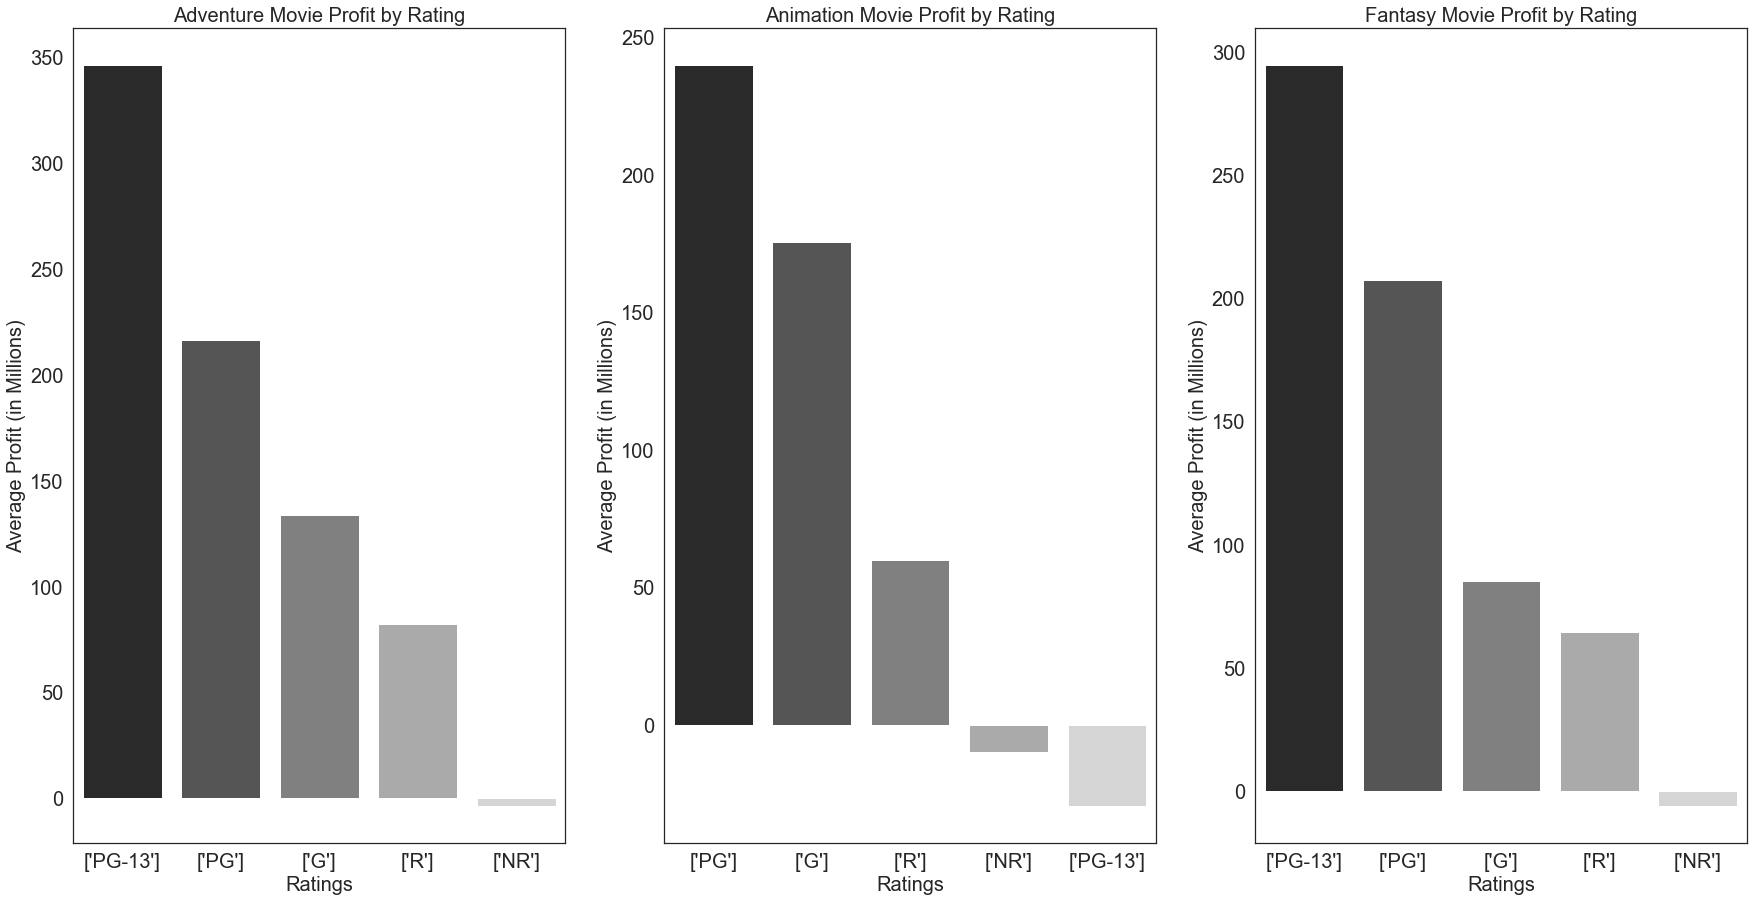

In [277]:
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(30, 15))

#Adventure subplot

sns.barplot(x='Ratings', y='total_profit',data=Adventure_df_by_rating,palette='gray',ax=ax1)
ax1.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax1.set_xlabel('Ratings',fontsize=20)
ax1.set_title('Adventure Movie Profit by Rating',fontsize=20)
ax1.tick_params(labelsize=20)

# #Animation subplot

sns.barplot(x='Ratings', y='total_profit',data=Animation_df_by_rating,palette='gray',ax=ax2)
ax2.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax2.set_xlabel('Ratings',fontsize=20)
ax2.set_title('Animation Movie Profit by Rating',fontsize=20)
ax2.tick_params(labelsize=20)

# #Fantasy subplot

sns.barplot(x='Ratings', y='total_profit',data=Fantasy_df_by_rating,palette='gray',ax=ax3)
ax3.set_ylabel('Average Profit (in Millions)',fontsize=20)
ax3.set_xlabel('Ratings',fontsize=20)
ax3.set_title('Fantasy Movie Profit by Rating',fontsize=20)
ax3.tick_params(labelsize=20)


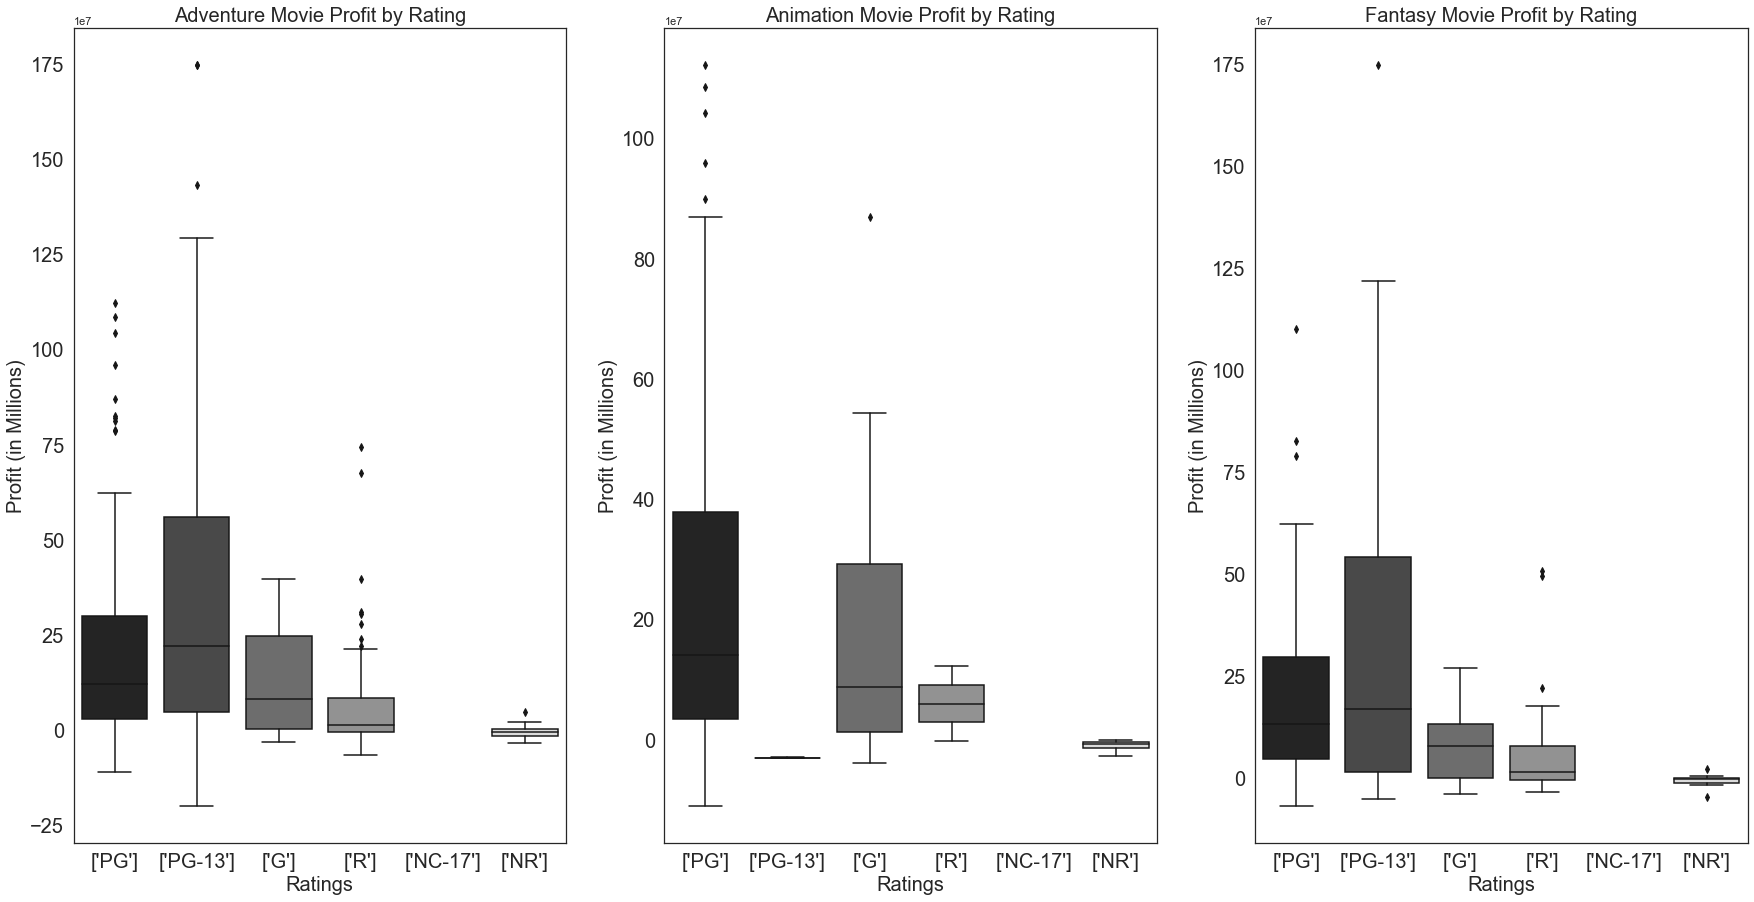

In [230]:
sns.set_style('white')
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3,figsize=(30, 15))


#Adventure subplot

sns.boxplot(x='Ratings', y='total_profit',data=Adventure_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax1)
ax1.set_ylabel('Profit (in Millions)',fontsize=20)
ax1.set_xlabel('Ratings',fontsize=20)
ax1.set_title('Adventure Movie Profit by Rating',fontsize=20)
ax1.tick_params(labelsize=20)
ax1.ticklabel_format(style='sci',scilimits = (7,7), axis='y')

#Animation subplot

sns.boxplot(x='Ratings', y='total_profit',data=Animation_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax2)
ax2.set_ylabel('Profit (in Millions)',fontsize=20)
ax2.set_xlabel('Ratings',fontsize=20)
ax2.set_title('Animation Movie Profit by Rating',fontsize=20)
ax2.tick_params(labelsize=20)
ax2.ticklabel_format(style='sci',scilimits = (7,7), axis='y')

#Fantasy subplot

sns.boxplot(x='Ratings', y='total_profit',data=Fantasy_df,palette='gray',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],ax=ax3)
ax3.set_ylabel('Profit (in Millions)',fontsize=20)
ax3.set_xlabel('Ratings',fontsize=20)
ax3.set_title('Fantasy Movie Profit by Rating',fontsize=20)
ax3.tick_params(labelsize=20)
ax3.ticklabel_format(style='sci',scilimits = (7,7), axis='y')


# Genres Explode

In [137]:
Explode_genres = Last_decade_gross.copy()

In [138]:
Explode_genres.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,Genres,Ratings
tmdb_ids,,,,,,,,,,
1865,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"['Adventure', 'Action', 'Fantasy']",['PG-13']
320288,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"['Science Fiction', 'Action', 'Adventure']",['PG-13']
99861,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"['Action', 'Adventure', 'Science Fiction']",['PG-13']
181808,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"['Science Fiction', 'Action', 'Adventure']",['PG-13']
140607,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"['Action', 'Adventure', 'Science Fiction', 'Fantasy']",['PG-13']


In [139]:
(list(Explode_genres.Genres))[0]

"['Adventure', 'Action', 'Fantasy']"

In [140]:
## Convert 

Explode_genres.Genres = Explode_genres.Genres.str.replace(']','').str.replace('[','').str.replace("'",'').str.split(",")
Explode_genres

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,Genres,Ratings
tmdb_ids,,,,,,,,,,
1865,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011,2010,"[Adventure, Action, Fantasy]",['PG-13']
320288,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019,2010,"[Science Fiction, Action, Adventure]",['PG-13']
99861,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015,2010,"[Action, Adventure, Science Fiction]",['PG-13']
181808,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017,2010,"[Science Fiction, Action, Adventure]",['PG-13']
140607,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,1747311220,2015,2010,"[Action, Adventure, Science Fiction, Fantasy]",['PG-13']
...,...,...,...,...,...,...,...,...,...,...
42151,"Oct 15, 2010",Down Terrace,30000,9812,9812,-20188,2010,2010,"[Drama, Action, Comedy]",['NR']
446397,"Jan 27, 2017",Emily,27000,3547,3547,-23453,2017,2010,[Drama],['NR']
226458,"Sep 1, 2015",Exeter,25000,0,489792,464792,2015,2010,"[Thriller, Horror]",['NR']


In [141]:
Explode_genres = Explode_genres.explode('Genres')
Explode_genres

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,Genres,Ratings
tmdb_ids,,,,,,,,,,
189,"Aug 22, 2014",Sin City: A Dame to Kill For,65000000,13757804,40650842,-24349158,2014,2010,Crime,['R']
189,"Aug 22, 2014",Sin City: A Dame to Kill For,65000000,13757804,40650842,-24349158,2014,2010,Action,['R']
189,"Aug 22, 2014",Sin City: A Dame to Kill For,65000000,13757804,40650842,-24349158,2014,2010,Thriller,['R']
377,"Apr 30, 2010",A Nightmare on Elm Street,35000000,63075011,117729621,82729621,2010,2010,Horror,['R']
559,"Sep 16, 2011",3,7200000,59774,295492,-6904508,2011,2010,Fantasy,['PG-13']
...,...,...,...,...,...,...,...,...,...,...
565501,"Dec 13, 2011",George Balanchine\'s The Nutcracker,19000000,2119994,2119994,-16880006,2011,2010,Fantasy,['NR']
570602,"Nov 9, 2018",Dr. Seussâ The Grinch,75000000,270620950,511002426,436002426,2018,2010,,['NR']
576071,"Mar 29, 2019",Unplanned,6000000,18107621,18107621,12107621,2019,2010,Drama,['R']


In [142]:
Explode_genres[Explode_genres['Genres']=='']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,Genres,Ratings
tmdb_ids,,,,,,,,,,
318230,"Aug 15, 2014",Nightlights,250000,21147,21147,-228853,2014,2010,,['NR']
335874,"May 15, 2015",Childless,1000000,1036,1036,-998964,2015,2010,,['NR']
365052,"Oct 23, 2015",The Looking Glass,300000,1711,1711,-298289,2015,2010,,['NR']
458033,"Oct 10, 2017",Demonic,3000000,0,4668109,1668109,2017,2010,,['NR']
570602,"Nov 9, 2018",Dr. Seussâ The Grinch,75000000,270620950,511002426,436002426,2018,2010,,['NR']
660452,"Oct 16, 2016",Mi America,2100000,3330,3330,-2096670,2016,2010,,['NR']
709705,"Feb 13, 2015",Hits,1000000,15156,15156,-984844,2015,2010,,['NR']


In [143]:
Explode_genres = Explode_genres[Explode_genres['Genres']!='']

In [144]:
list(Explode_genres.Genres.unique())

['Crime',
 ' Action',
 ' Thriller',
 'Horror',
 'Fantasy',
 ' Adventure',
 'Adventure',
 ' Fantasy',
 'Comedy',
 'Drama',
 ' Romance',
 ' Science Fiction',
 ' Horror',
 'Action',
 ' Drama',
 ' Comedy',
 ' Mystery',
 ' Family',
 ' Animation',
 'Animation',
 'Thriller',
 'Family',
 ' Crime',
 ' History',
 ' Western',
 ' Documentary',
 ' War',
 ' Music',
 'War',
 'Science Fiction',
 'Romance',
 'Mystery',
 'Documentary',
 'History',
 'Music',
 'Western']

In [145]:
Explode_genres.Genres = Explode_genres.Genres.str.replace(' ','')

/Users/Miriam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [146]:
len(list(Explode_genres.Genres.unique()))

18

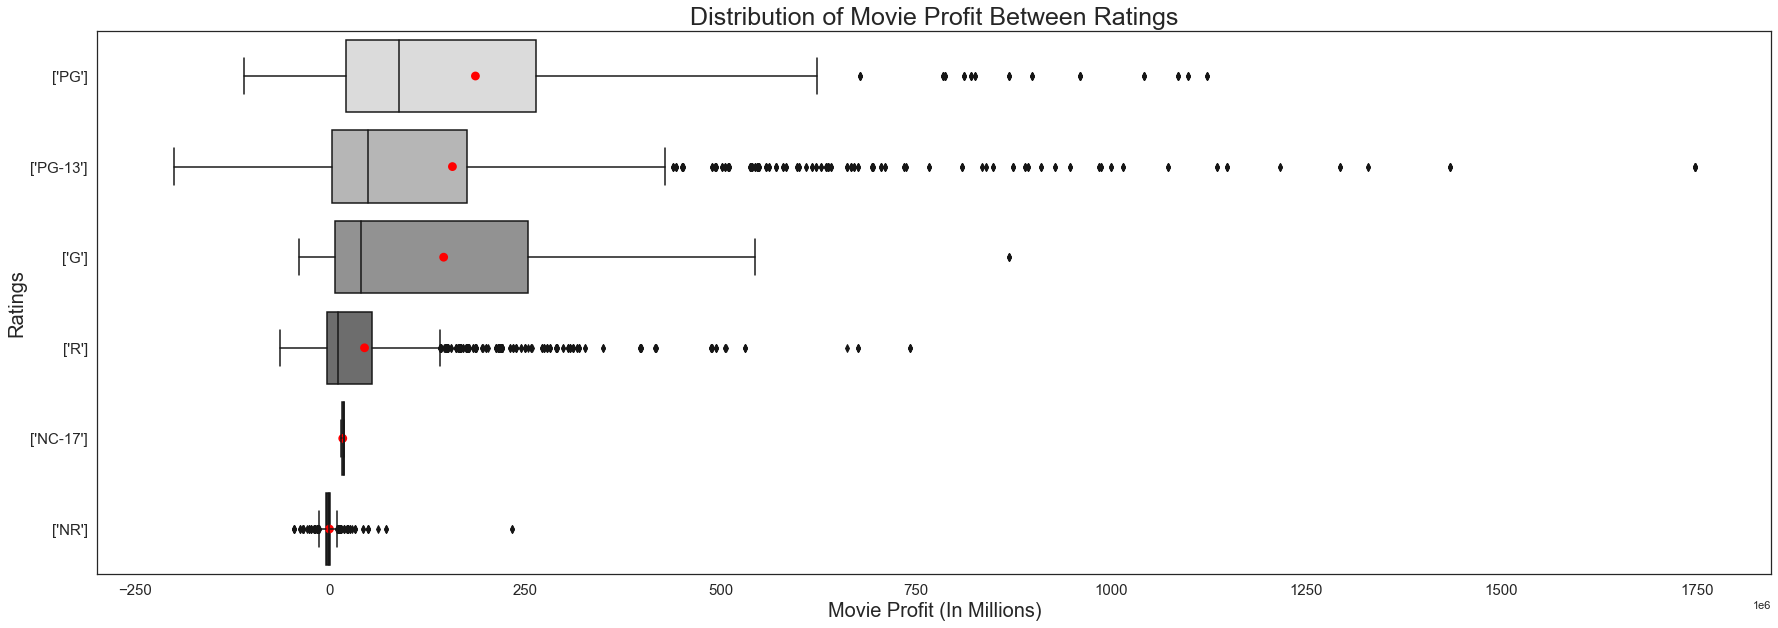

In [218]:

sns.set_style("white")
f, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',palette="gray_r",order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"])
sns.pointplot(y='Ratings',x='total_profit',data=Explode_genres,orient='h',linestyles = 'None', scale=1, ci=None,color='red',markers = 'o',order=["['PG']","['PG-13']","['G']","['R']","['NC-17']","['NR']"],label='mean')
sns.set(font="Helvetica")
plt.ylabel('Ratings',fontsize=20)
plt.title('Distribution of Movie Profit Between Ratings',fontsize=25)
plt.xlabel('Movie Profit (In Millions)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()


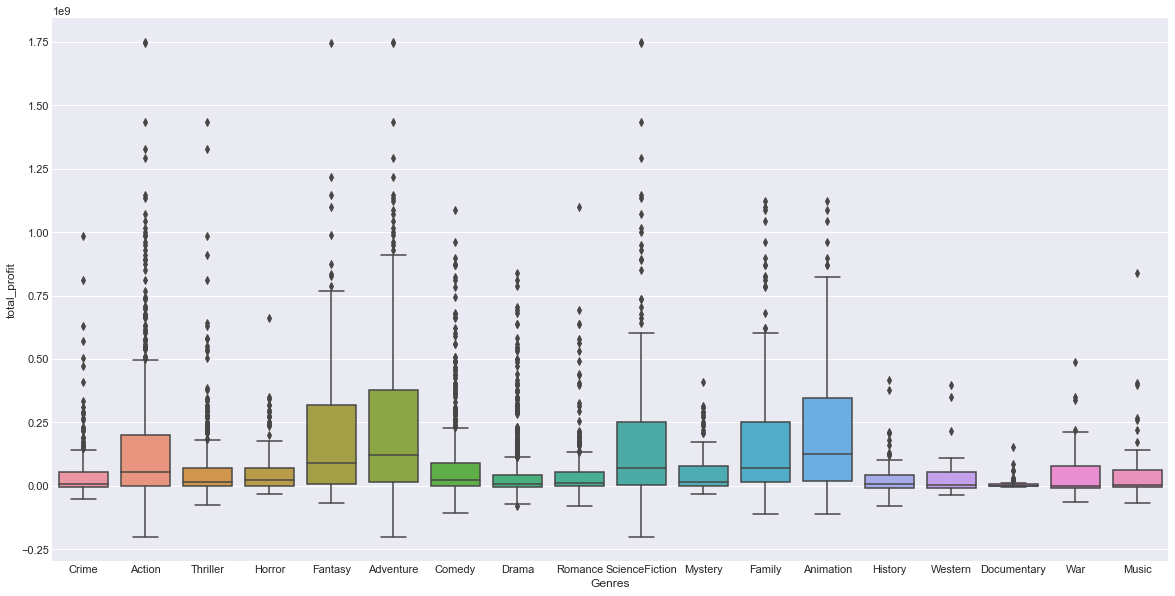

In [148]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(x='Genres',y='total_profit',data=Explode_genres)

In [149]:
top_3_df = Explode_genres[(Explode_genres['Genres'] == 'Adventure') | (Explode_genres['Genres'] == 'Animation') |(Explode_genres['Genres'] == 'Fantasy')].reset_index()
top_3_df

,tmdb_ids,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,Genres,Ratings
0,559,"Sep 16, 2011",3,7200000,59774,295492,-6904508,2011,2010,Fantasy,['PG-13']
1,559,"Sep 16, 2011",3,7200000,59774,295492,-6904508,2011,2010,Adventure,['PG-13']
2,564,"Jun 9, 2017",The Mummy,195000000,80101125,409953905,214953905,2017,2010,Adventure,['PG-13']
3,564,"Jun 9, 2017",The Mummy,195000000,80101125,409953905,214953905,2017,2010,Fantasy,['PG-13']
4,620,"Jul 15, 2016",Ghostbusters,144000000,128350574,229008658,85008658,2016,2010,Fantasy,['PG']
...,...,...,...,...,...,...,...,...,...,...,...
696,471968,"Dec 31, 2017",Posledniy bogatyr,8500000,0,30700192,22200192,2017,2010,Adventure,['NR']
697,474395,"Jul 27, 2018",Teen Titans Go! To The Movies,10000000,29790236,51620593,41620593,2018,2010,Animation,['PG']
698,503314,"Jan 16, 2019",Dragon Ball Super: Broly,8500000,30376755,122747755,114247755,2019,2010,Animation,['PG']
699,508763,"Jan 11, 2019",A Dogâs Way Home,61000000,41952715,81149689,20149689,2019,2010,Adventure,['PG']


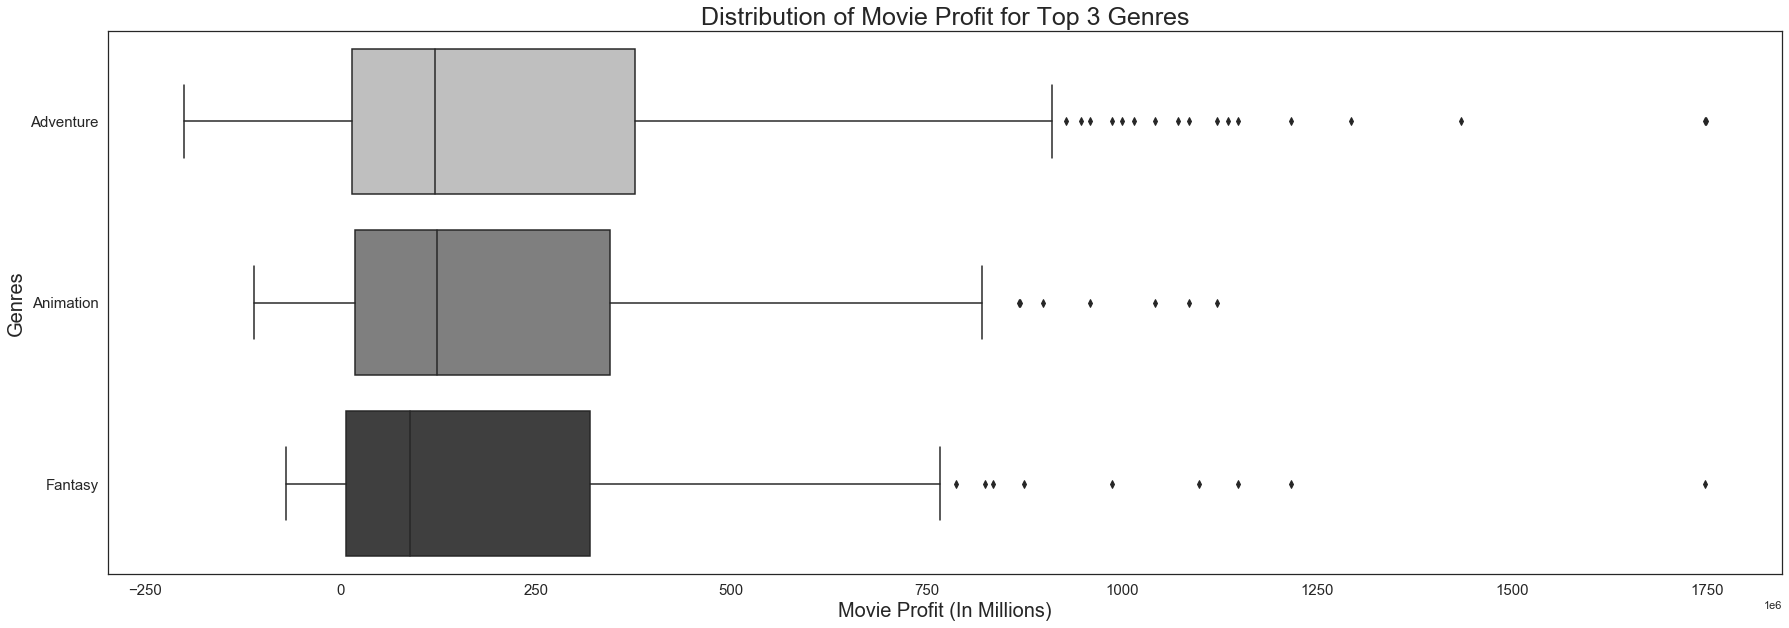

In [178]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(30, 10))
sns.boxplot(y='Genres',x='total_profit',data=top_3_df,orient='h',palette="gray_r",order=['Adventure','Animation','Fantasy'])
sns.set(font="Helvetica")
plt.ylabel('Genres',fontsize=20)
plt.title('Distribution of Movie Profit for Top 3 Genres',fontsize=25)
plt.xlabel('Movie Profit (In Millions)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()

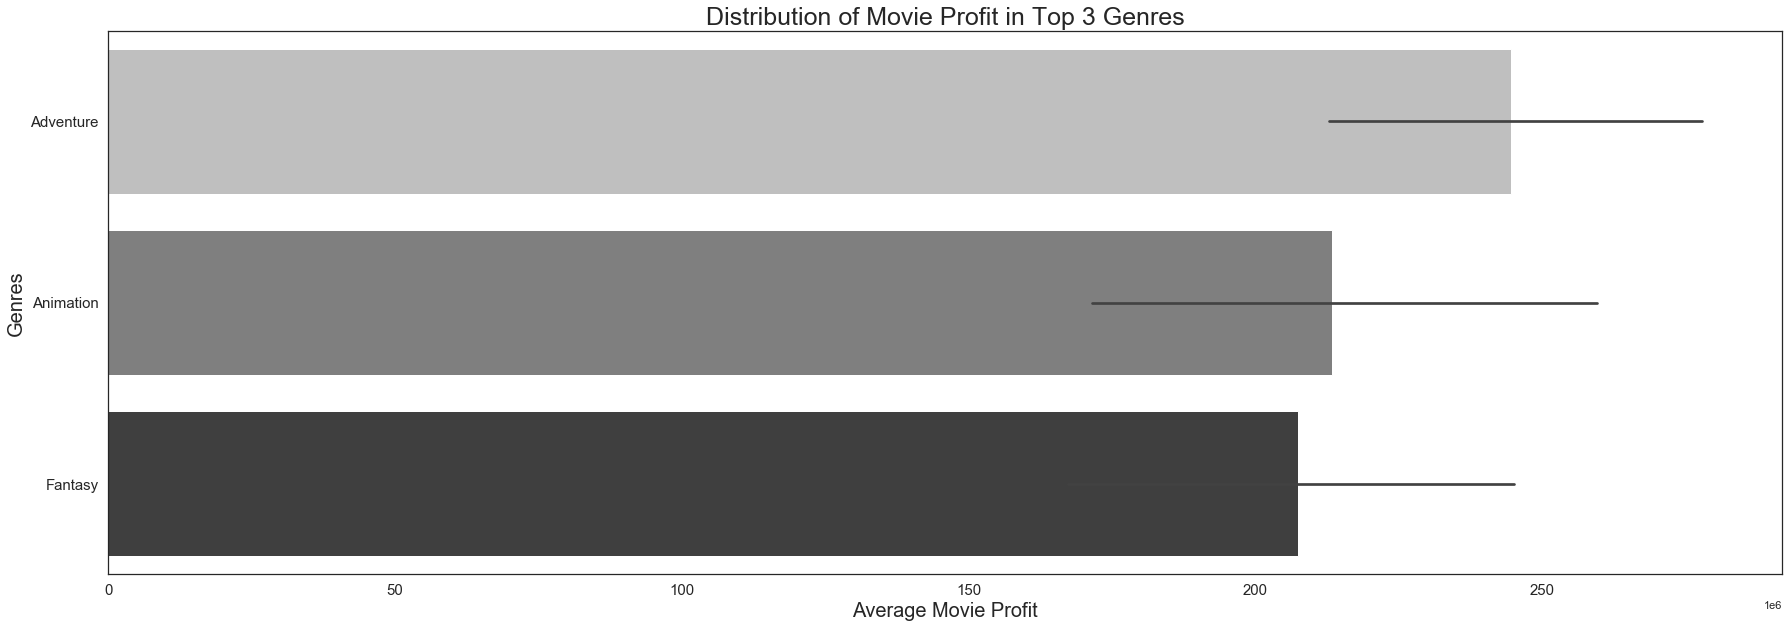

In [175]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(30, 10))
sns.barplot(y='Genres',x='total_profit',data=top_3_df,orient='h',palette="gray_r",order=['Adventure','Animation','Fantasy'])
sns.set(font="Helvetica")
plt.ylabel('Genres',fontsize=20)
plt.title('Distribution of Movie Profit in Top 3 Genres',fontsize=25)
plt.xlabel('Average Movie Profit',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ticklabel_format(style='sci',scilimits = (6,6), axis='x')
plt.show()

In [151]:
Explode_genres[Explode_genres['movie'] == 'Avengers: Infinity War']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_profit,release_year,decade,Genres,Ratings
tmdb_ids,,,,,,,,,,
299536,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,Adventure,['PG-13']
299536,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,Action,['PG-13']
299536,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,1748134200,2018,2010,ScienceFiction,['PG-13']


In [152]:
Explode_genres['Genres'].value_counts()

Drama             910
Comedy            647
Action            493
Thriller          483
Adventure         356
Romance           276
Crime             249
ScienceFiction    231
Family            218
Horror            217
Fantasy           207
Animation         138
Mystery           131
History            93
Music              60
War                51
Documentary        50
Western            24
Name: Genres, dtype: int64

In [153]:
Explode_genres.groupby('Genres').describe()

production_budget                                         \
                           count          mean           std        min   
Genres                                                                    
Action                     493.0  7.884489e+07  7.187269e+07    30000.0   
Adventure                  356.0  1.050768e+08  7.483320e+07   500000.0   
Animation                  138.0  8.078152e+07  5.711396e+07   350000.0   
Comedy                     647.0  3.655163e+07  4.089880e+07     9000.0   
Crime                      249.0  3.234185e+07  3.469590e+07   100000.0   
Documentary                 50.0  4.368060e+06  1.163218e+07    50000.0   
Drama                      910.0  2.468061e+07  3.289921e+07    27000.0   
Family                     218.0  7.690596e+07  5.994319e+07   250000.0   
Fantasy                    207.0  9.225710e+07  7.252877e+07   100000.0   
History                     93.0  2.706667e+07  2.125853e+07  1300000.0   
Horror                     217.0  1.671910e+07  2.538698e+07    25000.0   
Music                       60.0  2.380750e+07  2.652327e+07   100000.0   
Mystery                    131.0  2.776376e+07  3.205491e+07    70000.0   
Romance                    276.0  2.622520e+07  3.245718e+07     9000.0   
ScienceFiction             231.0  8.666271e+07  8.014357e+07    75000.0   
Thriller                   483.0  3.353094e+07  4.266542e+07    25000.0   
War                         51.0  3.739804e+07  3.669376e+07  1300000.0   
Western                     24.0  5.344583e+07  6.668178e+07  2000000.0   

                                                                  \
                       25%         50%          75%          max   
Genres                                                             
Action          25000000.0  50000000.0  120000000.0  410600000.0   
Adventure       40000000.0  99000000.0  160000000.0  410600000.0   
Animation       30000000.0  71500000.0  130000000.0  260000000.0   
Comedy           8150000.0  22000000.0   50000000.0  230000000.0   
Crime           10000000.0  25000000.0   40000000.0  275000000.0   
Documentary       570000.0   1100000.0    2800000.0   80000000.0   
Drama            5000000.0  13000000.0   30000000.0  275000000.0   
Family          25000000.0  62000000.0  129750000.0  260000000.0   
Fantasy         35000000.0  80000000.0  150000000.0  410600000.0   
History         12000000.0  20000000.0   35000000.0  100000000.0   
Horror           3500000.0   7000000.0   20000000.0  190000000.0   
Music            5000000.0  14750000.0   33750000.0  125000000.0   
Mystery          5650000.0  20000000.0   37500000.0  170000000.0   
Romance          7000000.0  16500000.0   32125000.0  200000000.0   
ScienceFiction  15500000.0  58000000.0  150000000.0  350000000.0   
Thriller         6000000.0  20000000.0   40000000.0  300000000.0   
War             12000000.0  22500000.0   58000000.0  152000000.0   
Western          8925000.0  30500000.0   69000000.0  275000000.0   

               domestic_gross                ... release_year         decade  \
                        count          mean  ...          75%     max  count   
Genres                                       ...                               
Action                  493.0  8.680779e+07  ...      2016.00  2019.0  493.0   
Adventure               356.0  1.223228e+08  ...      2016.00  2019.0  356.0   
Animation               138.0  1.053278e+08  ...      2016.00  2019.0  138.0   
Comedy                  647.0  5.124032e+07  ...      2016.00  2019.0  647.0   
Crime                   249.0  3.585027e+07  ...      2015.00  2019.0  249.0   
Documentary              50.0  8.468322e+06  ...      2015.00  2018.0   50.0   
Drama                   910.0  2.940399e+07  ...      2016.00  2019.0  910.0   
Family                  218.0  9.462372e+07  ...      2016.00  2019.0  218.0   
Fantasy                 207.0  1.048822e+08  ...      2017.00  2019.0  207.0   
History                  93.0  2.603743e+07  ...  